In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow import keras

In [2]:
df = pd.read_csv('three_dataset.csv')
df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [3]:
def premium(age):
    model_path = 'three.keras'
    x = df['Age'].values.reshape(-1,1)
    y = df['Premium'].values.reshape(-1,1)
    xn = x.min()
    yn = y.min()
    xx = x.max()
    yx = y.max()
    x = (x-xn)/(xx-xn)
    y = (y-yn)/(yx-yn)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(1,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = 'adam', loss='mean_squared_error')
        hist = model.fit(x,y, epochs=500)
        model.save('three.keras')
        lv = hist.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(x, y, label='actual', color='blue')
        plt.plot(x,pred, label='predicted', color='pink')
        plt.grid(True)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
    return model.predict(np.array([[(age-xn)/(xx-xn)]]))[0][0]*(yx-yn)+yn


Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step - loss: 0.5084
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4845
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4643
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4451
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4262
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4079
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3900
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3726
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3556
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3393
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3234
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3080
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2934
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.2793
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2660
Epoch 16/500
1/1 ━━━━━━━━━━━━━

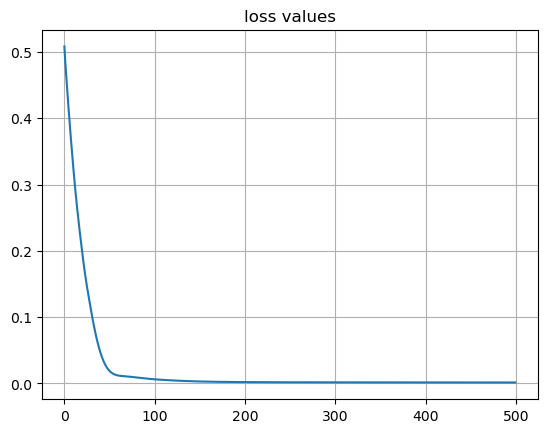

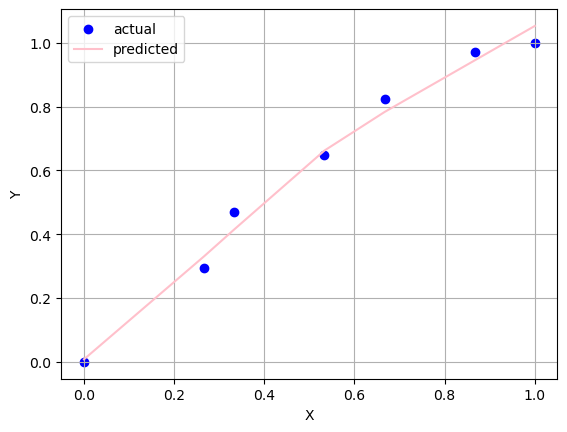

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
10138.8367600739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
14199.058160185814
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
25145.883917808533


In [4]:
print(premium(18))
print(premium(21))
print(premium(30))